In [11]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [12]:
# Load dataset
data = pd.read_csv('../data/ENB2012_data_with_columns.csv')

# Check for NaN values and replace or drop them
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [13]:
# Define input and output variables
X = data.iloc[:, :-2]
y_hl = data['Heating_Load']
y_cl = data['Cooling_Load']

In [14]:
# Initialize models with best parameters
best_params_hl = {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
best_params_cl = {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
xgb_model_hl = XGBRegressor(**best_params_hl)
xgb_model_cl = XGBRegressor(**best_params_cl)

In [15]:
# Lists to store metrics for each run
rmse_list_hl = []
mape_list_hl = []
rmse_list_cl = []
mape_list_cl = []

In [16]:
# Run the model 30 times for Heating Load
for run in range(30):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_hl, test_size=0.2, random_state=run)
    
    # Train the model
    xgb_model_hl.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb_model_hl.predict(X_test)
    
    # Calculate RMSE and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    
    # Append metrics to the lists
    rmse_list_hl.append(rmse)
    mape_list_hl.append(mape)

In [17]:
# Run the model 30 times for Cooling Load
for run in range(30):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_cl, test_size=0.2, random_state=run)
    
    # Train the model
    xgb_model_cl.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb_model_cl.predict(X_test)
    
    # Calculate RMSE and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    
    # Append metrics to the lists
    rmse_list_cl.append(rmse)
    mape_list_cl.append(mape)

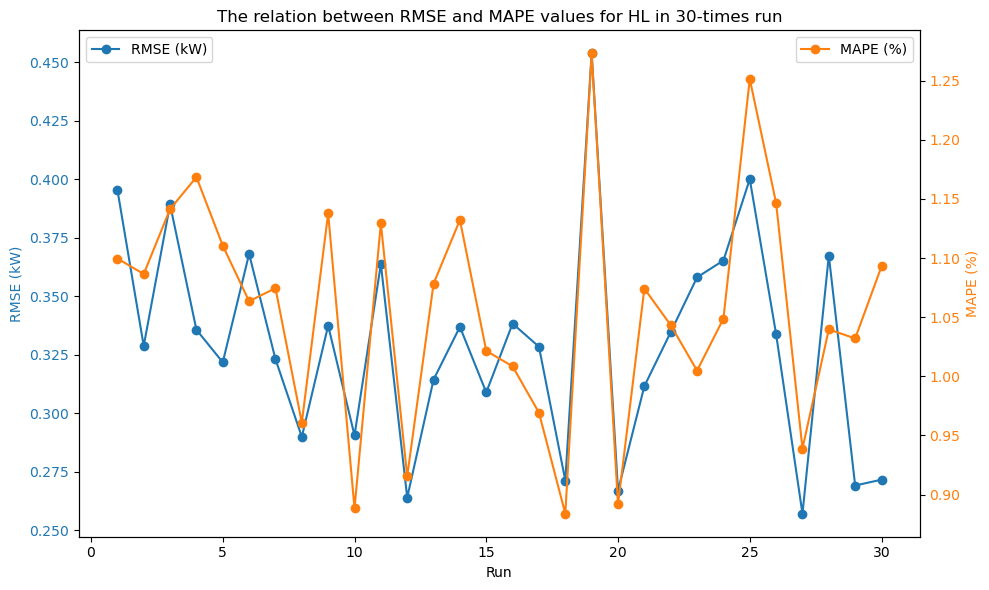

In [18]:
# Create the plot for Heating Load
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE
color = 'tab:blue'
ax1.set_xlabel('Run')
ax1.set_ylabel('RMSE (kW)', color=color)
ax1.plot(range(1, 31), rmse_list_hl, color=color, marker='o', label='RMSE (kW)')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('MAPE (%)', color=color)
ax2.plot(range(1, 31), mape_list_hl, color=color, marker='o', linestyle='-', label='MAPE (%)')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('The relation between RMSE and MAPE values for HL in 30-times run')
fig.tight_layout()  # Ensure the plot fits into the figure area
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the plot
plt.savefig('../results/figures/rmse_vs_mape_hl_30_runs.png')

# Show the plot
plt.show()

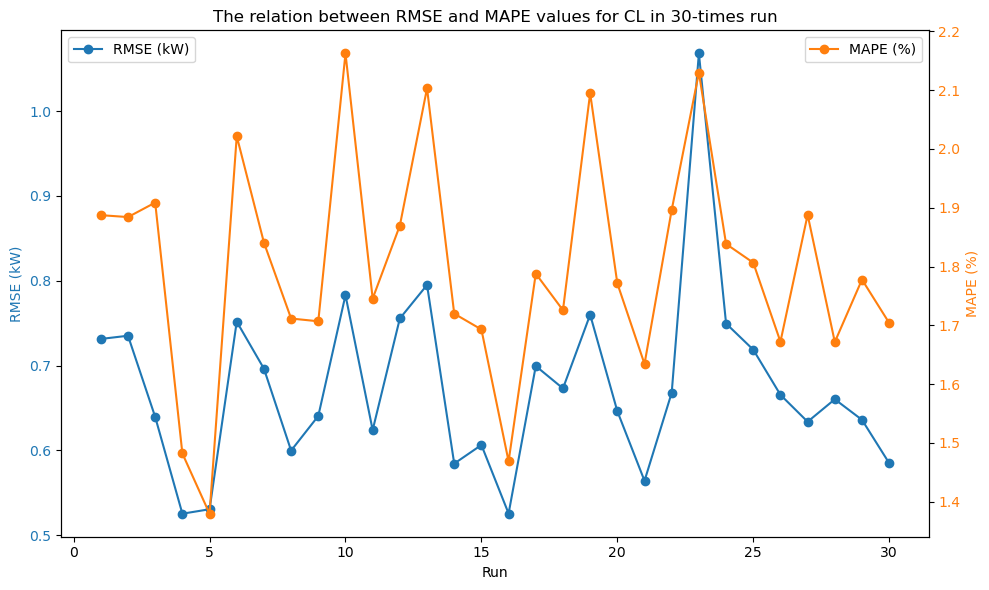

In [19]:
# Create the plot for Cooling Load
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RMSE
color = 'tab:blue'
ax1.set_xlabel('Run')
ax1.set_ylabel('RMSE (kW)', color=color)
ax1.plot(range(1, 31), rmse_list_cl, color=color, marker='o', label='RMSE (kW)')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('MAPE (%)', color=color)
ax2.plot(range(1, 31), mape_list_cl, color=color, marker='o', linestyle='-', label='MAPE (%)')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('The relation between RMSE and MAPE values for CL in 30-times run')
fig.tight_layout()  # Ensure the plot fits into the figure area
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Save the plot
plt.savefig('../results/figures/rmse_vs_mape_cl_30_runs.png')

# Show the plot
plt.show()

In [21]:
# Create DataFrame for Heating Load metrics
df_hl = pd.DataFrame({
    'Run': range(1, 31),
    'RMSE_HL': rmse_list_hl,
    'MAPE_HL': mape_list_hl
})

# Create DataFrame for Cooling Load metrics
df_cl = pd.DataFrame({
    'Run': range(1, 31),
    'RMSE_CL': rmse_list_cl,
    'MAPE_CL': mape_list_cl
})

# Write the data to an Excel file
with pd.ExcelWriter('../results/metrics/rmse_mape_metrics.xlsx') as writer:
    df_hl.to_excel(writer, sheet_name='Heating Load', index=False)
    df_cl.to_excel(writer, sheet_name='Cooling Load', index=False)